# Performance Insights: Ranking Binance Accounts with Key Financial Metrics

In [1]:
# Importing Necessary Libraries

import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

###  Objective: Analyze the dataset to calculate financial metrics for each account, rank them, and provide a top 20 list.

To complete the task, follow these step-by-step


## Step 1: Data Exploration and Cleaning

In [2]:
# Load the dataset

df = pd.read_csv(r"D:\TRADES_CopyTr_90D_ROI.csv")
df.head()

,Port_IDs,Trade_History
0,3925368433214965504,"[{'time': 1718899656000, 'symbol': 'SOLUSDT', ..."
1,4002413037164645377,"[{'time': 1718980078000, 'symbol': 'NEARUSDT',..."
2,3923766029921022977,"[{'time': 1718677164000, 'symbol': 'ETHUSDT', ..."
3,3994879592543698688,"[{'time': 1718678214000, 'symbol': 'ETHUSDT', ..."
4,3926423286576838657,"[{'time': 1718979615000, 'symbol': 'ETHUSDT', ..."


In [3]:
# Initialize an empty list for flattened trade data
trade_data = []

# Iterate through each row, safely parsing and flattening trade history
for _, row in df.iterrows():
    try:
        # Parse Trade_History and ensure it's a list
        trades = ast.literal_eval(row['Trade_History'])
        if isinstance(trades, list):
            # Add each trade with Port_IDs to trade_data
            trade_data.extend({**trade, 'Port_IDs': row['Port_IDs']} for trade in trades)
    except (ValueError, SyntaxError) as e:
        print(f"Error parsing Trade_History for Port_ID {row['Port_IDs']}: {e}")

# Convert flattened trade data into a DataFrame and display the result
df_trades = pd.DataFrame(trade_data)
df_trades.head()

Error parsing Trade_History for Port_ID 3919965573764932864: malformed node or string: nan


,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy,Port_IDs
0,1718899656000,SOLUSDT,BUY,132.53700,-0.994027,USDT,1988.05500,USDT,0.0,USDT,SOL,15.0,LONG,True,3925368433214965504
1,1718899618000,DOGEUSDT,BUY,0.12182,-0.279796,USDT,1398.98088,USDT,0.0,USDT,DOGE,11484.0,LONG,False,3925368433214965504
2,1718899618000,DOGEUSDT,BUY,0.12182,-0.039494,USDT,197.47022,USDT,0.0,USDT,DOGE,1621.0,LONG,False,3925368433214965504
3,1718899616000,DOGEUSDT,BUY,0.12182,-0.008284,USDT,16.56752,USDT,0.0,USDT,DOGE,136.0,LONG,True,3925368433214965504
4,1718899616000,DOGEUSDT,BUY,0.12182,-0.046109,USDT,92.21774,USDT,0.0,USDT,DOGE,757.0,LONG,True,3925368433214965504


In [4]:
# Data Overview
print("Data Shape:", df_trades.shape)
print("\nData Info:")
print(df_trades.info())
print("\nStatistical Summary:")
df_trades.describe().T

Data Shape: (211277, 15)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211277 entries, 0 to 211276
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 211277 non-null  int64  
 1   symbol               211277 non-null  object 
 2   side                 211277 non-null  object 
 3   price                211277 non-null  float64
 4   fee                  211277 non-null  float64
 5   feeAsset             211277 non-null  object 
 6   quantity             211277 non-null  float64
 7   quantityAsset        211277 non-null  object 
 8   realizedProfit       211277 non-null  float64
 9   realizedProfitAsset  211277 non-null  object 
 10  baseAsset            211277 non-null  object 
 11  qty                  211277 non-null  float64
 12  positionSide         211277 non-null  object 
 13  activeBuy            211277 non-null  bool   
 14  Port_IDs             211277 non

,count,mean,std,min,25%,50%,75%,max
time,211277.0,1.717434e+12,1.351340e+09,1.713804e+12,1.716470e+12,1.717761e+12,1.718640e+12,1.718990e+12
price,211277.0,4.129040e+03,1.536353e+04,1.581000e-04,1.438300e-01,2.483300e+00,4.462100e+01,7.210500e+04
fee,211277.0,-3.827867e-01,1.793858e+00,-1.204587e+02,-1.798678e-01,-5.173200e-02,-9.454490e-03,0.000000e+00
quantity,211277.0,9.755095e+02,4.667099e+03,6.694000e-03,2.334091e+01,1.277750e+02,4.040120e+02,6.022933e+05
realizedProfit,211277.0,3.270818e+00,5.789510e+01,-3.269194e+03,0.000000e+00,0.000000e+00,5.775900e-01,8.186254e+03
qty,211277.0,1.090626e+04,1.562781e+05,1.000000e-03,2.000000e+00,2.600000e+01,5.790000e+02,2.100000e+07
Port_IDs,211277.0,3.964346e+18,6.102597e+16,3.672755e+18,3.942631e+18,3.977117e+18,4.011627e+18,4.041860e+18



Missing Values:
time                   0
symbol                 0
side                   0
price                  0
fee                    0
feeAsset               0
quantity               0
quantityAsset          0
realizedProfit         0
realizedProfitAsset    0
baseAsset              0
qty                    0
positionSide           0
activeBuy              0
Port_IDs               0
dtype: int64


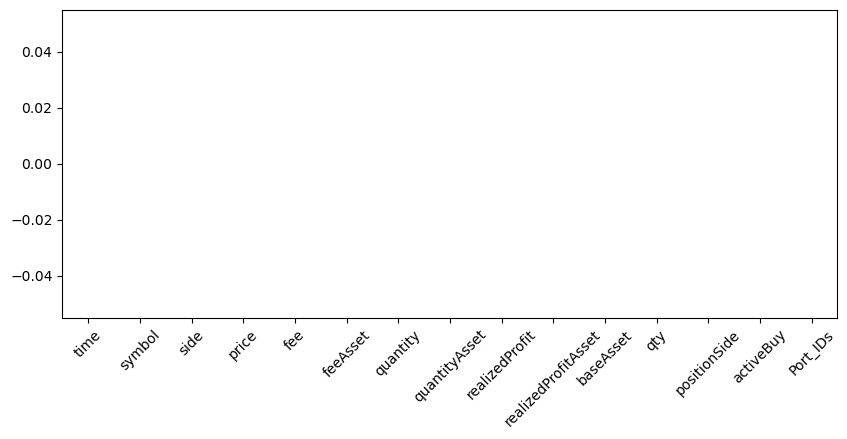

In [5]:
# Data Cleaning
# Check for missing values
print("\nMissing Values:")
print(df_trades.isnull().sum())

# Visualize missing data
df_trades.isna().sum().plot(kind='bar',figsize=(10, 4))
plt.tick_params(axis='x', rotation=45)
plt.show()

In [6]:
# Check for duplicate rows
duplicates = df_trades.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)
if duplicates > 0:
    df_trades.drop_duplicates(inplace=True)
    print("Duplicates removed.")


Number of Duplicate Rows: 11251
Duplicates removed.


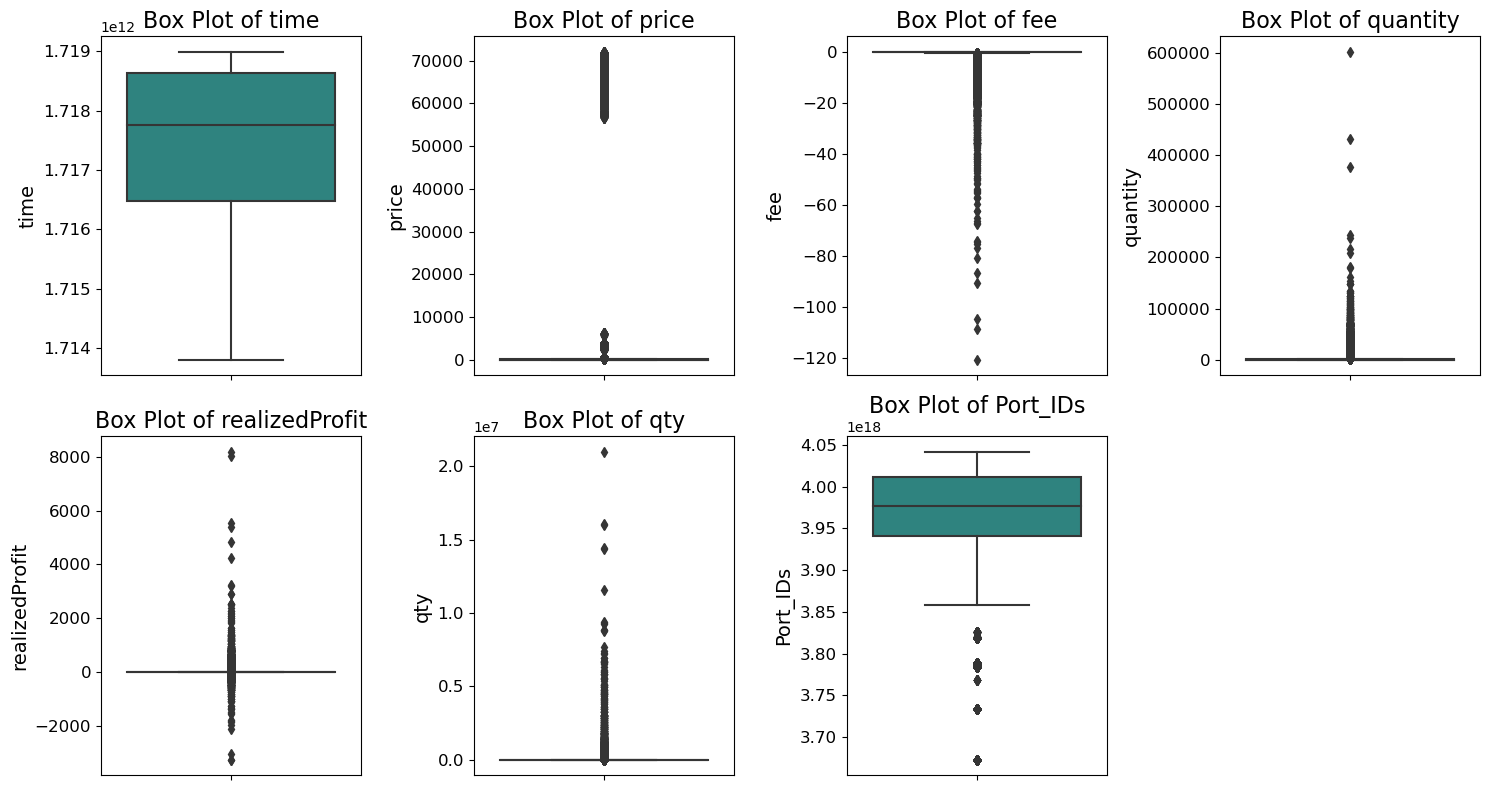

In [7]:
# Step 1: Identify numeric columns
numeric_cols = df_trades.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Set the number of columns for subplots
n_cols = 4  # You can change this value to fit your layout

# Step 3: Calculate the number of rows needed
n_rows = len(numeric_cols) // n_cols + (len(numeric_cols) % n_cols > 0)

# Step 4: Create subplots
plt.figure(figsize=(15, n_rows * 4))  # Adjust figure size as needed

# Step 5: Create box plots for each numeric column
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)  # Create a subplot for each numeric column
    sns.boxplot(y=df_trades[col], palette='viridis')
    plt.title(f'Box Plot of {col}', fontsize=16)
    plt.ylabel(col, fontsize=14)
    plt.xlabel('')  # No x label needed for vertical box plots
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

# Step 6: Adjust layout
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plot

**The box plots show the distribution of the data for each variable. The box represents the interquartile range (IQR), which is the range between the 25th and 75th percentiles. The line inside the box represents the median. The whiskers extend to 1.5 times the IQR from the box. Any points outside of the whiskers are considered outliers. From the box plots, we can see that the following:**

- **Time** appears normally distributed with no outliers
- **Price** has numerous outliers.
- **Fee** has numerous outliers.
- **Quantity** has numerous outliers.
- **RealizedProfit** has numerous outliers.
- **Qty** has numerous outliers.
- **Port_IDs** is normally distributed and has very few outliers.

These insights highlight the importance of addressing potential outliers when analyzing the data, as they can significantly influence the results of statistical analyses.

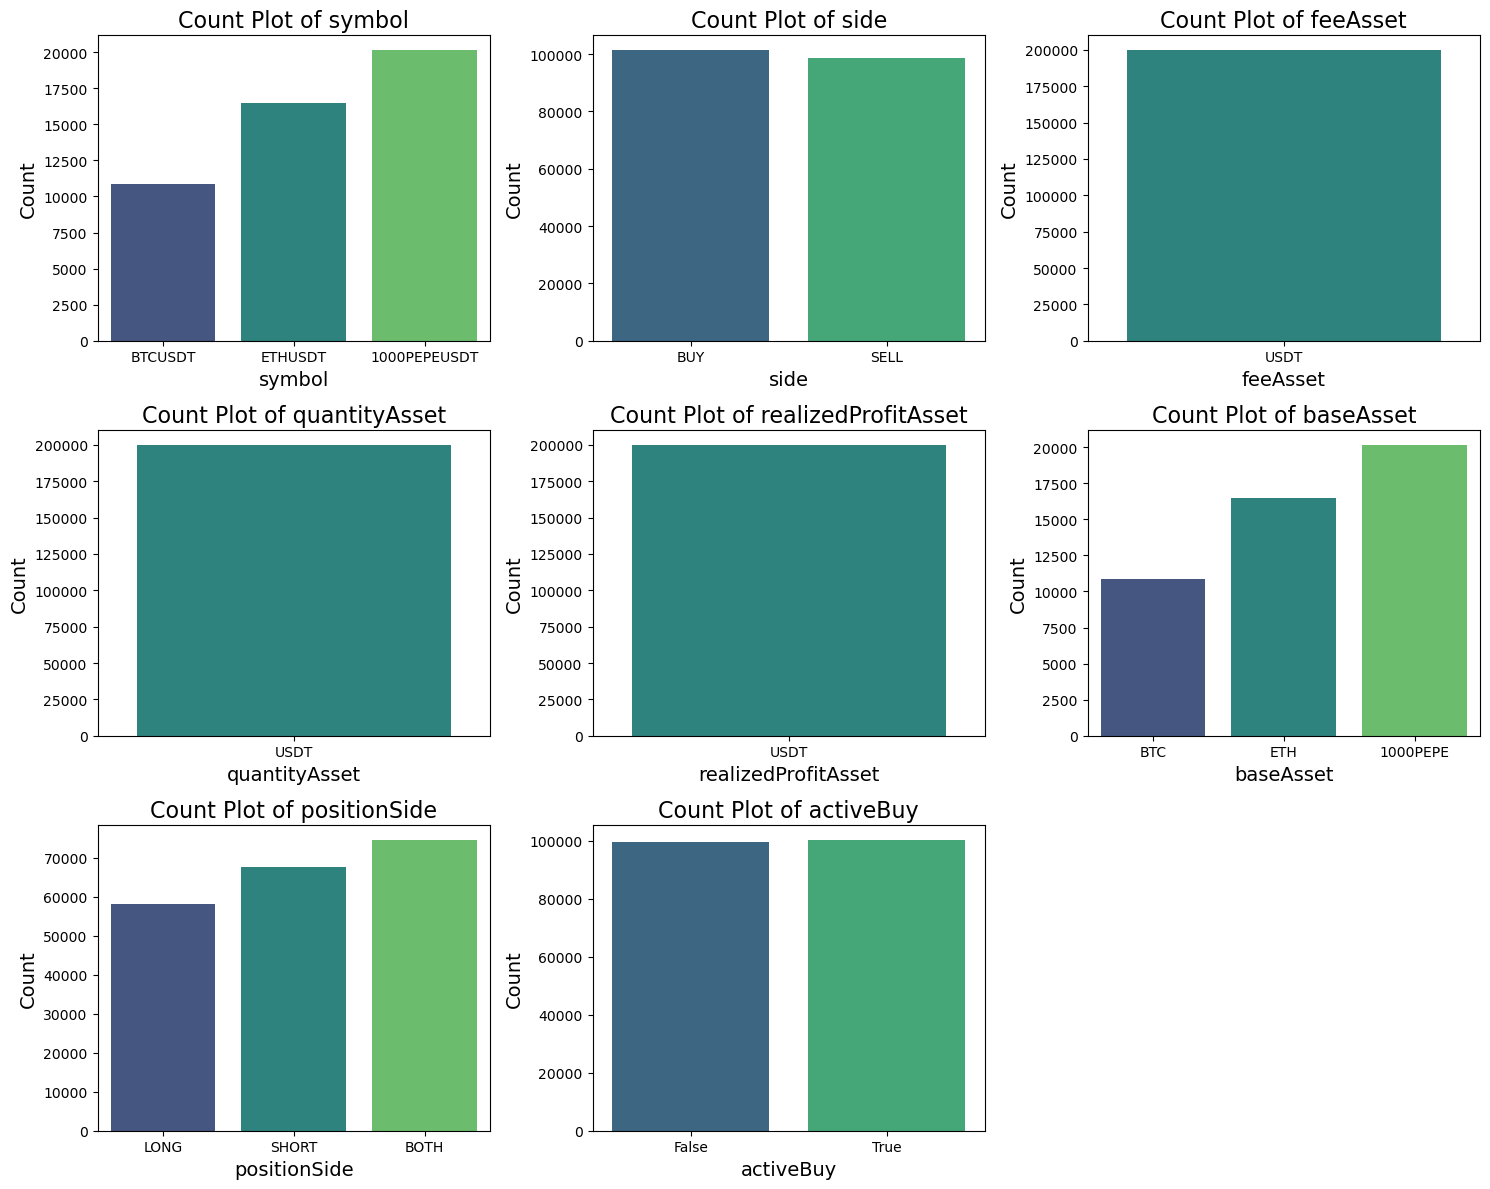

In [8]:
# Step 1: Identify categorical columns
categorical_cols = df_trades.select_dtypes(include=['object', 'bool']).columns

# Step 2: Set the number of columns for subplots
n_cols = 3  # You can change this value to fit your layout

# Step 3: Calculate the number of rows needed
n_rows = len(categorical_cols) // n_cols + (len(categorical_cols) % n_cols > 0)

# Step 4: Create subplots
plt.figure(figsize=(15, n_rows * 4))  # Adjust figure size as needed

# Step 5: Create count plots for each categorical column
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)  # Create a subplot for each categorical column
    
    # Limit the number of unique values for 'symbol' and 'baseAsset'
    if col in ['symbol', 'baseAsset']:
        top_n = 3  # Change this to the number of top categories you want to display
        top_categories = df_trades[col].value_counts().nlargest(top_n).index
        filtered_df = df_trades[df_trades[col].isin(top_categories)]
        sns.countplot(x=filtered_df[col], palette='viridis')  # Use countplot for categorical data on x-axis
    else:
        sns.countplot(x=df_trades[col], palette='viridis')  # Use countplot for other categorical data

    plt.title(f'Count Plot of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    
# Step 6: Adjust layout
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plot

**This image shows a series of bar charts, each representing the count of different categories within a specific feature of a dataset. Here's a breakdown:**

**Symbol:**
- **BTCUSDT:** The highest count, indicating it's the most frequently traded symbol.
- **ETHUSDT:** The second most common symbol.
- **1000PEPEUSDT:** The least traded of the three.

**Side:**
- **BUY:** Shows a very large count, indicating it's the dominant side of trades.
- **SELL:** A similar count to Buy, suggesting a balanced market with equal numbers of buyers and sellers.

**FeeAsset:**
- **USDT:** Overwhelmingly the most common asset used for fees.

**QuantityAsset:**
- **USDT:** The dominant asset for trading quantities.

**RealizedProfitAsset:**
- **USDT:** Represents the main asset used for realized profits.

**BaseAsset:**
- **1000PEPE:** The most popular base asset, followed by ETH.
- **BTC: Shows** the lowest count, indicating it's used as the base asset less frequently.

**PositionSide:**
- **SHORT:** The highest count.
- **BOTH:** The second most popular side.
- **LONG:** The least traded.

**ActiveBuy:**
- **True:** The most common state of activeBuy.
- **False:** A lower count than True, indicating it's less frequent for activeBuy to be false.

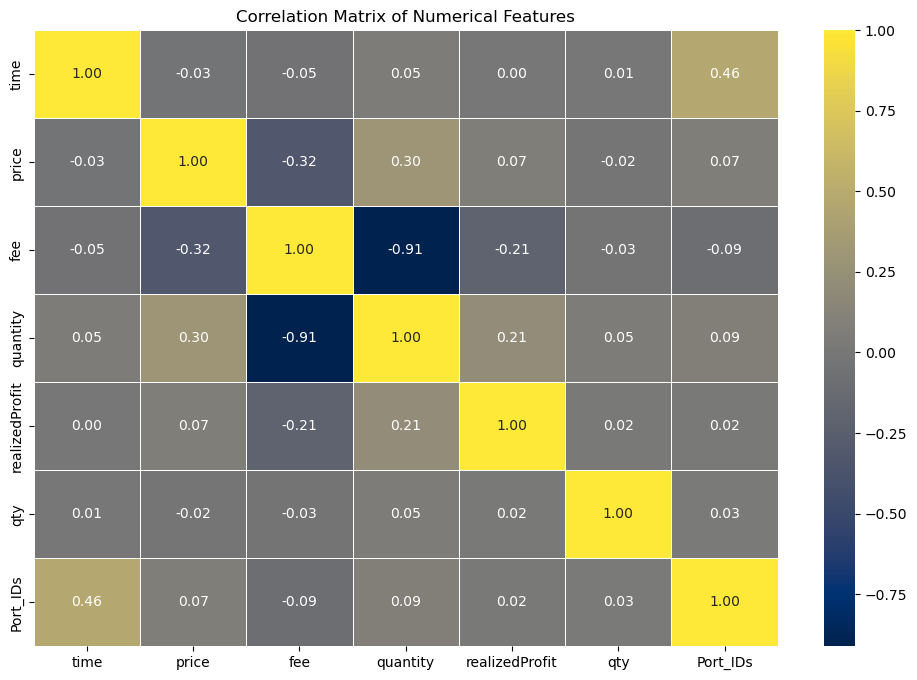

In [9]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = df_trades[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='cividis', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**The correlation matrix shows that:**

- **Fee and quantity** are highly negatively correlated (-0.91). This means that as the fee increases, the quantity decreases.
- **Time and Port_IDs** are positively correlated (0.46). This means that as the time increases, the Port_IDs increases.

## Metrics to Calculate

### Calculate metrics ROI (Return on Investment)

In [10]:
# Calculate ROI
df_trades['investment'] = df_trades['quantity'] * df_trades['price']
df_trades['ROI'] = (df_trades['realizedProfit'] / df_trades['investment']) * 100

- **Investment:** The investment for each trade is calculated by multiplying the quantity of the asset purchased or sold by its price. This represents the total amount invested in the trade.
- **ROI (Return on Investment):** The ROI for each trade is calculated by dividing the realizedProfit by the investment and then multiplying by 100 to express it as a percentage. This metric indicates the percentage return earned on each trade.

In [11]:
# Calculate ROI by side (buy/sell)
roi_by_side = df_trades.groupby('side')['ROI'].mean().reset_index()
roi_by_side

,side,ROI
0,BUY,42.582467
1,SELL,28.574232


- **ROI by Side:** This calculation groups the trades by the side (whether it was a buy or sell trade) and computes the average ROI for each group.
- **BUY Trades:** The average ROI for buy trades is approximately 42.58%. This means that, on average, buy trades yielded a return of 42.58% on the investment.
- **SELL Trades:** The average ROI for sell trades is approximately 28.57%. This indicates that sell trades, on average, yielded a return of 28.57% on the investment.

In [12]:
# Calculate average ROI per trade
avg_roi_per_trade = df_trades['ROI'].mean()

# Calculate overall ROI
overall_roi = (df_trades['realizedProfit'].sum() / df_trades['investment'].sum()) * 100

print(f"Average ROI per trade: {avg_roi_per_trade:.2f}%")
print(f"Overall ROI: {overall_roi:.2f}%")

Average ROI per trade: 35.68%
Overall ROI: 0.00%


- **Average ROI per Trade:** This metric calculates the mean ROI across all trades.
- **Interpretation:** The average ROI per trade is 35.68%, indicating that, on average, each trade yielded a return of 35.68% on the investment.
- **Overall ROI:** This metric calculates the total ROI for all trades combined.
- **Interpretation:** The overall ROI is 0.00%, which means that, when considering all trades together, the total realized profit as a percentage of the total investment is 0.00%. This could indicate that the profits and losses across all trades have balanced out, resulting in a net ROI of 0%.

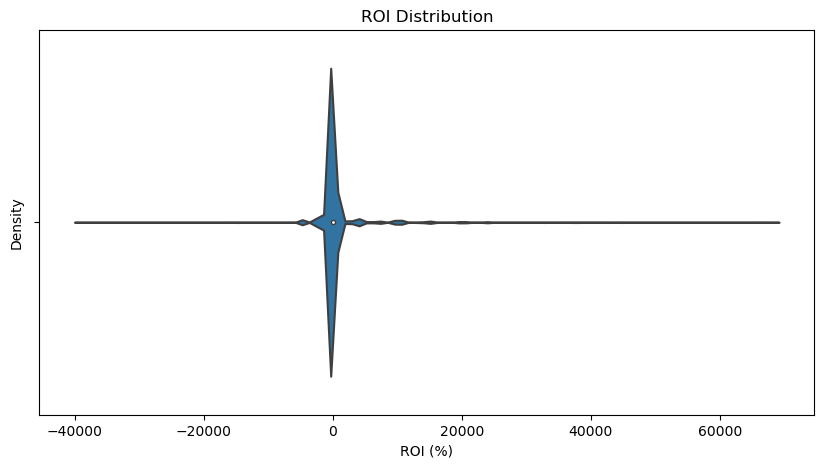

In [13]:
# Violin Plot ROI distribution
plt.figure(figsize=(10, 5))
sns.violinplot(x=df_trades['ROI'])
plt.title('ROI Distribution')
plt.xlabel('ROI (%)')
plt.ylabel('Density')
plt.show()

- **Violin Plot:** This plot visualizes the distribution of ROI across all trades.
- **Interpretation:** The violin plot shows most trades have an ROI near zero, with a few extreme outliers. This indicates frequent small returns and occasional large fluctuations, suggesting the need for strategy refinement.

### Calculate metrics PnL (Profit and Loss)

In [14]:
# Calculate PnL
df_trades['PnL'] = df_trades['realizedProfit'].sum()

# Calculate PnL by Port_ID
pnl_by_port = df_trades.groupby('Port_IDs')['realizedProfit'].sum()

pnl_by_port

Port_IDs
3672754654734989568     565.547761
3733192481840423936    2653.591900
3768170840939476993     243.668899
3784403294629753856    2493.618898
3786761687746711808     170.220200
                          ...     
4039279455324236544    1023.498387
4040382575336130560       0.000000
4040843843196854529    2043.478100
4041804592937345281    -796.682686
4041860229502600193    2327.336000
Name: realizedProfit, Length: 149, dtype: float64

- The total realized profit across all trades, which represents the overall profit or loss from trading activities.
- The total realized profit for each portfolio, allowing for comparative analysis across different portfolios.
- The PnL for each Port_IDs. For example, the portfolio with ID 3672754654734989568 has a PnL of 565.547761.

In [15]:
positive_pnl = df_trades[df_trades['PnL'] > 0]
negative_pnl = df_trades[df_trades['PnL'] < 0]

print(f"Number of transactions with positive PnL: {len(positive_pnl)}")
print(f"Number of transactions with negative PnL: {len(negative_pnl)}")

Number of transactions with positive PnL: 200026
Number of transactions with negative PnL: 0


- **Positive PnL:** Trades that resulted in a profit.
    
- **Negative PnL:** Trades that resulted in a loss (though in this case, there were no negative PnL transactions).
    
- All the transactions in this dataset were profitable, with no losses.

### Calculate metrics Sharpe Ratio

In [16]:
# Calculate daily returns
df_trades['return'] = df_trades['realizedProfit'] / (df_trades['price'] * df_trades['quantity'])

# Calculate daily average return
avg_return = df_trades['return'].mean()

# Calculate daily volatility (standard deviation)
volatility = df_trades['return'].std()

# Calculate Sharpe Ratio
sharpe_ratio = avg_return / volatility
sharpe_ratio

0.0434557581972295

- **Daily returns** are calculated by dividing the realized profit by the transaction value.

- **Average return** gives a summary of daily performance.

- **Volatility** measures the risk, or variability, in returns.

- The **Sharpe ratio** compares the risk-adjusted return, and here it is calculated as approximately 0.0435, which indicates a positive but modest risk-return profile.

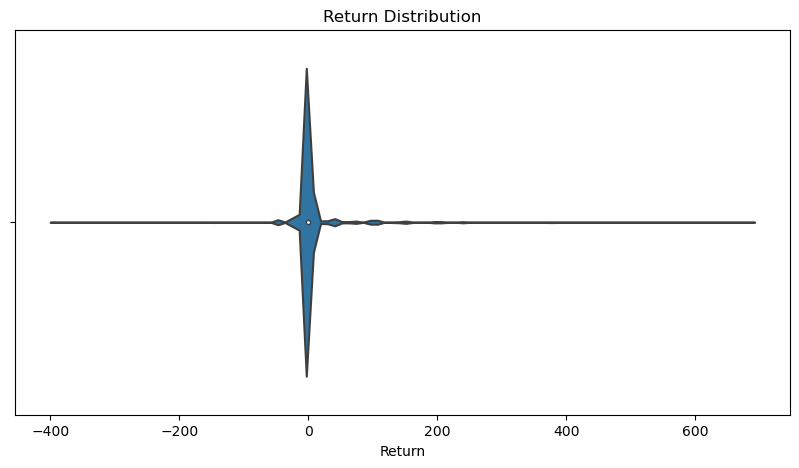

In [17]:
# Violin Plot
plt.figure(figsize=(10, 5))
sns.violinplot(x = df_trades['return'])
plt.title('Return Distribution')
plt.xlabel('Return')
plt.show()

- **Violin Plot:** This plot visualizes the Sharpe Ratio across all trades.
- **Interpretation:** The violin plot shows the distribution of returns, with a strong peak around 0 and a long tail extending to the right.

### Calculate metrics MDD (Maximum Drawdown)

In [18]:
# Calculate cumulative returns
df_trades['cumulative_returns'] = (df_trades['realizedProfit'].cumsum())

# Identify peaks
df_trades['peak'] = df_trades['cumulative_returns'].cummax()

# Calculate drawdowns
df_trades['drawdown'] = (df_trades['cumulative_returns'] - df_trades['peak']) / df_trades['peak']

# Determine Maximum Drawdown
max_drawdown = df_trades['drawdown'].min()  # This will give you the maximum drawdown value
print(f"Maximum Drawdown: {max_drawdown:.2%}")

Maximum Drawdown: -20.85%


The code calculates the **Maximum Drawdown (MDD)** of a portfolio or trading strategy over a period. In this example, the maximum drawdown is found to be -20.85%, which means the largest peak-to-trough loss was 20.85%.

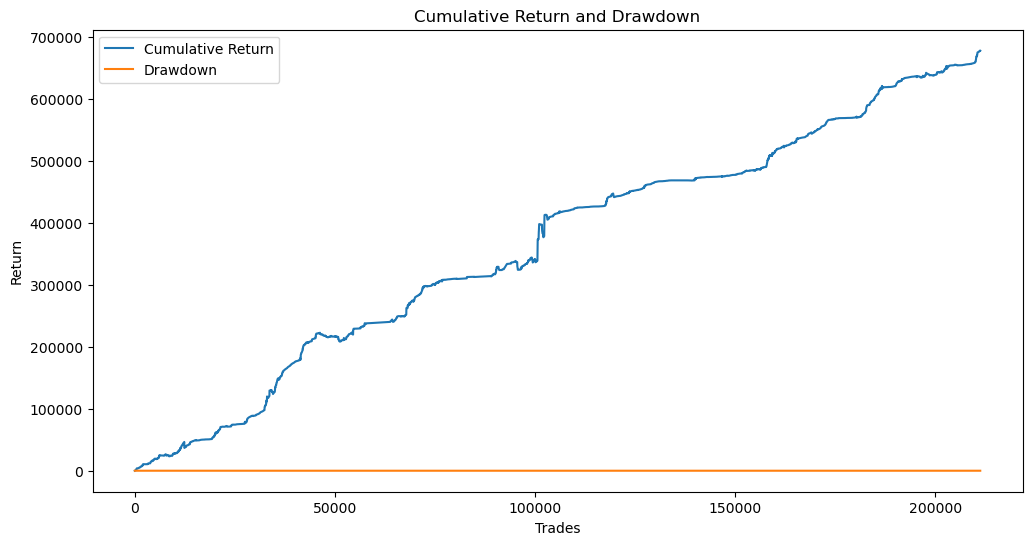

In [19]:
# Plot cumulative return and drawdown
plt.figure(figsize=(12, 6))
plt.plot(df_trades['cumulative_returns'], label='Cumulative Return')
plt.plot(df_trades['drawdown'], label='Drawdown')
plt.title('Cumulative Return and Drawdown')
plt.xlabel('Trades')
plt.ylabel('Return')
plt.legend()
plt.show()

- The cumulative return is the total profit or loss made over time.
- The drawdown is the maximum loss from a peak high to a trough low.
- The image shows that the strategy has a positive cumulative return with a relatively low drawdown.

### Calculate metrics Win Rate, Win Positions & Total Positions

In [20]:
# Combine side and positionSide to classify trades
df_trades['position'] = df_trades.apply(lambda row: f"{row['side']}_{row['positionSide']}", axis=1)

# Identify profitable positions
df_trades['profitable'] = df_trades['realizedProfit'] > 0

# Calculate Win Positions
win_positions = df_trades[df_trades['profitable']].shape[0]

# Calculate Total Positions
total_positions = df_trades.shape[0]

# Calculate Win Rate
win_rate = win_positions / total_positions

print(f"Win Positions: {win_positions}")
print(f"Total Positions: {total_positions}")
print(f"Win Rate: {win_rate:.4f} ({win_rate*100:.2f}%)")

# Summarize Performance by Trade Type
performance_summary = df_trades.groupby('position').agg(
    total_profit=('realizedProfit', 'sum'),
    win_positions=('realizedProfit', lambda x: (x > 0).sum()),
    total_positions=('realizedProfit', 'count'),
    avg_quantity=('quantity', 'mean'),
    avg_qty=('qty', 'mean')
).reset_index()

# Calculate win rate for each trade type
performance_summary['win_rate'] = (performance_summary['win_positions'] / performance_summary['total_positions']) * 100

print("\nPerformance Summary by Trade Type:")
performance_summary

Win Positions: 79473
Total Positions: 200026
Win Rate: 0.3973 (39.73%)

Performance Summary by Trade Type:


,position,total_profit,win_positions,total_positions,avg_quantity,avg_qty,win_rate
0,BUY_BOTH,132259.063880,21291,39014,596.691168,6780.990471,54.572717
1,BUY_LONG,0.000000,0,29437,1235.314651,21014.773805,0.000000
2,BUY_SHORT,333961.277625,26145,33006,1270.270718,7641.456621,79.212870
3,SELL_BOTH,39707.542271,10314,35522,648.736251,7507.127034,29.035527
4,SELL_LONG,171182.409944,21723,28586,1215.701640,21719.222148,75.991744
5,SELL_SHORT,0.000000,0,34461,1241.138472,7307.059017,0.000000


- **Win Rate Calculation:** Win rate is determined by dividing the number of profitable trades by the total number of trades. It provides a key performance indicator for evaluating the success of a trading strategy.
- **Win Positions:** The number of profitable trades in the dataset, which indicates the total successful positions.
- **Total Positions:** The overall number of trades recorded, regardless of profitability, providing the total market activity.

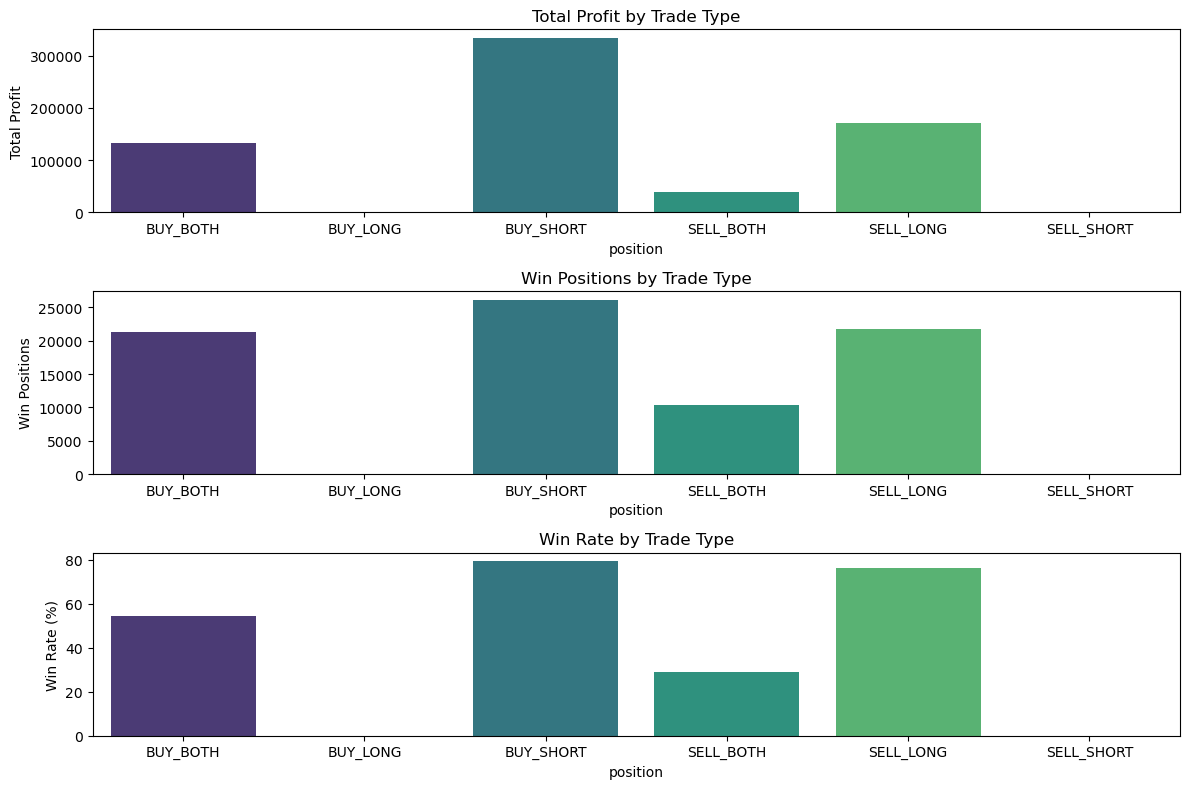

In [21]:
# Plotting
plt.figure(figsize=(12, 8))

# Bar plot for Total Profit
plt.subplot(3, 1, 1)
sns.barplot(data=performance_summary, x='position', y='total_profit', palette='viridis')
plt.title('Total Profit by Trade Type')
plt.ylabel('Total Profit')

# Bar plot for Win Positions
plt.subplot(3, 1, 2)
sns.barplot(data=performance_summary, x='position', y='win_positions', palette='viridis')
plt.title('Win Positions by Trade Type')
plt.ylabel('Win Positions')

# Bar plot for Win Rate
plt.subplot(3, 1, 3)
sns.barplot(data=performance_summary, x='position', y='win_rate', palette='viridis')
plt.title('Win Rate by Trade Type')
plt.ylabel('Win Rate (%)')

plt.tight_layout()
plt.show()

**The graph shows the total profit, number of win positions, and win rate for different trade types.**

- Buying short yields the most profit and the highest win rate.
- Selling long trades have the second highest win rate, followed by selling short and selling both.
- Buying long and buying both have the lowest win rates and no profits.
- The graph shows that different trade types have different performance outcomes.

In [22]:
# Group by Port_IDs and calculate metrics
metrics = df_trades.groupby('Port_IDs').apply(lambda x: pd.Series({
    'ROI (%)': (x['realizedProfit'].sum() / x['quantity'].sum()) * 100,
    'PnL': x['realizedProfit'].sum(),
    'Sharpe Ratio': (x['realizedProfit'].mean() / x['realizedProfit'].std()),
    'Maximum Drawdown (MDD)': (x['realizedProfit'].cummax() - x['realizedProfit'].cummin()).max(),
    'Win Rate': ((x['realizedProfit'] > 0).sum() / len(x)),
    'Win Positions': ((x['realizedProfit'] > 0).sum()),
    'Total Positions': len(x)
})).reset_index()

# Print DataFrame
print(metrics)

# Save the DataFrame with metrics
metrics.to_csv('metrics_by_port_id.csv')

print("Metrics calculated and saved.")

                Port_IDs   ROI (%)          PnL  Sharpe Ratio  \
0    3672754654734989568  0.480363   565.547761      0.187596   
1    3733192481840423936  0.232470  2653.591900      0.059481   
2    3768170840939476993  8.779089   243.668899      0.424277   
3    3784403294629753856  0.340279  2493.618898      0.107410   
4    3786761687746711808  0.282980   170.220200      0.185711   
..                   ...       ...          ...           ...   
144  4039279455324236544  1.027423  1023.498387      0.479261   
145  4040382575336130560  0.000000     0.000000           NaN   
146  4040843843196854529  0.965300  2043.478100      0.362019   
147  4041804592937345281 -0.142773  -796.682686     -0.084601   
148  4041860229502600193  1.349300  2327.336000      0.462961   

     Maximum Drawdown (MDD)  Win Rate  Win Positions  Total Positions  
0                 91.497690  0.446855          206.0            461.0  
1               1839.264000  0.781197          457.0            585.0  
2  

**Output Interpretation:**
The output shows the metrics DataFrame with the following columns:

- **Port_IDs:** The unique identifier for each portfolio.

- **ROI (%):** The Return on Investment as a percentage.

- **PnL:** The total Profit and Loss for each portfolio.

- **Sharpe Ratio:** The risk-adjusted return for each portfolio.

- **Maximum Drawdown (MDD):** The largest loss from a peak to a trough in the cumulative returns for each portfolio.

- **Win Rate:** The percentage of profitable trades for each portfolio.

- **Win Positions:** The number of profitable trades for each portfolio.

- **Total Positions:** The total number of trades for each portfolio.

For example, the portfolio with Port_IDs 3672754654734989568 has an ROI of 0.480363%, a PnL of 565.547761, a Sharpe Ratio of 0.187596, a Maximum Drawdown of 91.497690, a Win Rate of 0.446855 (44.6855%), 206 Win Positions, and 461 Total Positions.

## Step 2: Feature Engineering

In [23]:
# Assuming df is your DataFrame
X = metrics.drop(['Port_IDs', 'PnL'], axis=1)  # Drop ID and target variable
y = metrics['PnL']

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data
X_imputed = imputer.fit_transform(X)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_imputed, y)

# Get feature importance
importances = model.feature_importances_

# Normalize the importances to sum to 1
weights = importances / importances.sum()

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X_imputed)

# Calculate weighted scores
weighted_scores = X_scaled * weights
final_scores = weighted_scores.sum(axis=1)

# Add the final scores to the DataFrame
metrics['Weighted_Scores'] = final_scores

metrics

,Port_IDs,ROI (%),PnL,Sharpe Ratio,Maximum Drawdown (MDD),Win Rate,Win Positions,Total Positions,Weighted_Scores
0,3672754654734989568,0.480363,565.547761,0.187596,91.497690,0.446855,206.0,461.0,0.118738
1,3733192481840423936,0.232470,2653.591900,0.059481,1839.264000,0.781197,457.0,585.0,0.249755
2,3768170840939476993,8.779089,243.668899,0.424277,127.078645,0.428571,6.0,14.0,0.184592
3,3784403294629753856,0.340279,2493.618898,0.107410,266.267402,0.302932,1767.0,5833.0,0.285882
4,3786761687746711808,0.282980,170.220200,0.185711,101.915298,0.430380,34.0,79.0,0.098433
...,...,...,...,...,...,...,...,...,...
144,4039279455324236544,1.027423,1023.498387,0.479261,53.779434,0.551613,171.0,310.0,0.166682
145,4040382575336130560,0.000000,0.000000,NaN,0.000000,0.000000,0.0,70.0,0.038444
146,4040843843196854529,0.965300,2043.478100,0.362019,575.940640,0.270833,13.0,48.0,0.130256
147,4041804592937345281,-0.142773,-796.682686,-0.084601,563.821660,0.227273,75.0,330.0,0.066572


**Output Interpretation:**
The output shows the metrics DataFrame with the following columns:

- **Port_IDs:** The unique identifier for each portfolio.

- **ROI (%):** The Return on Investment as a percentage.

- **PnL:** The total Profit and Loss for each portfolio.

- **Sharpe Ratio:** The risk-adjusted return for each portfolio.

- **Maximum Drawdown (MDD):** The largest loss from a peak to a trough in the cumulative returns for each portfolio.

- **Win Rate:** The percentage of profitable trades for each portfolio.

- **Win Positions:** The number of profitable trades for each portfolio.

- **Total Positions:** The total number of trades for each portfolio.

- **Weighted_Scores:** The final weighted scores for each portfolio.

For example, the portfolio with Port_IDs 3672754654734989568 has a weighted score of 0.118738.

In [24]:
metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Port_IDs                149 non-null    int64  
 1   ROI (%)                 149 non-null    float64
 2   PnL                     149 non-null    float64
 3   Sharpe Ratio            148 non-null    float64
 4   Maximum Drawdown (MDD)  149 non-null    float64
 5   Win Rate                149 non-null    float64
 6   Win Positions           149 non-null    float64
 7   Total Positions         149 non-null    float64
 8   Weighted_Scores         149 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 10.6 KB


### Weight Adjustments:
##### Experiment with adjusting weights for various metrics to see how rankings might shift, and include a brief analysis on the impact of these changes.

In [25]:
# Define the weights (sum of weights should be 1 or 100)
weights = {
    'ROI (%)': 0.2,
    'Sharpe Ratio': 0.2,
    'Maximum Drawdown (MDD)': 0.2,
    'Win Rate': 0.2,
    'Win Positions': 0.1,
    'Total Positions': 0.1
}

# Normalize Maximum Drawdown (since it's a negative value, we want to invert the sign)
metrics['Normalized MDD'] = metrics['Maximum Drawdown (MDD)'].apply(lambda x: -x)

# Calculate the weighted score for each row
metrics['Weighted_Scores'] = (
    metrics['ROI (%)'] * weights['ROI (%)'] +
    metrics['Sharpe Ratio'] * weights['Sharpe Ratio'] +
    metrics['Normalized MDD'] * weights['Maximum Drawdown (MDD)'] +
    metrics['Win Rate'] * weights['Win Rate'] +
    metrics['Win Positions'] * weights['Win Positions'] +
    metrics['Total Positions'] * weights['Total Positions']
)

# Rank the positions based on weighted scores
metrics['Rank'] = metrics['Weighted_Scores'].rank(ascending=False)

# Display the results
metrics[['ROI (%)', 'Sharpe Ratio', 'Maximum Drawdown (MDD)', 'Win Rate', 'Weighted_Scores', 'Rank']]

,ROI (%),Sharpe Ratio,Maximum Drawdown (MDD),Win Rate,Weighted_Scores,Rank
0,0.480363,0.187596,91.497690,0.446855,48.623425,42.0
1,0.232470,0.059481,1839.264000,0.781197,-263.438171,134.0
2,8.779089,0.424277,127.078645,0.428571,-21.489341,62.0
3,0.340279,0.107410,266.267402,0.302932,706.896644,7.0
4,0.282980,0.185711,101.915298,0.430380,-8.903245,56.0
...,...,...,...,...,...,...
144,1.027423,0.479261,53.779434,0.551613,37.755773,45.0
145,0.000000,NaN,0.000000,0.000000,NaN,NaN
146,0.965300,0.362019,575.940640,0.270833,-108.768497,95.0
147,-0.142773,-0.084601,563.821660,0.227273,-72.264352,79.0


**Output Interpretation:**
The output shows the metrics DataFrame with the following columns:

- **ROI (%):** The Return on Investment as a percentage.

- **Sharpe Ratio:** The risk-adjusted return for each portfolio.

- **Maximum Drawdown (MDD):** The largest loss from a peak to a trough in the cumulative returns for each portfolio.

- **Win Rate:** The percentage of profitable trades for each portfolio.

- **Weighted_Scores:** The final weighted scores for each portfolio.

- **Rank:** The rank of each portfolio based on the weighted scores.

For example, the portfolio with Port_IDs 3672754654734989568 has a weighted score of 48.623425 and a rank of 42.

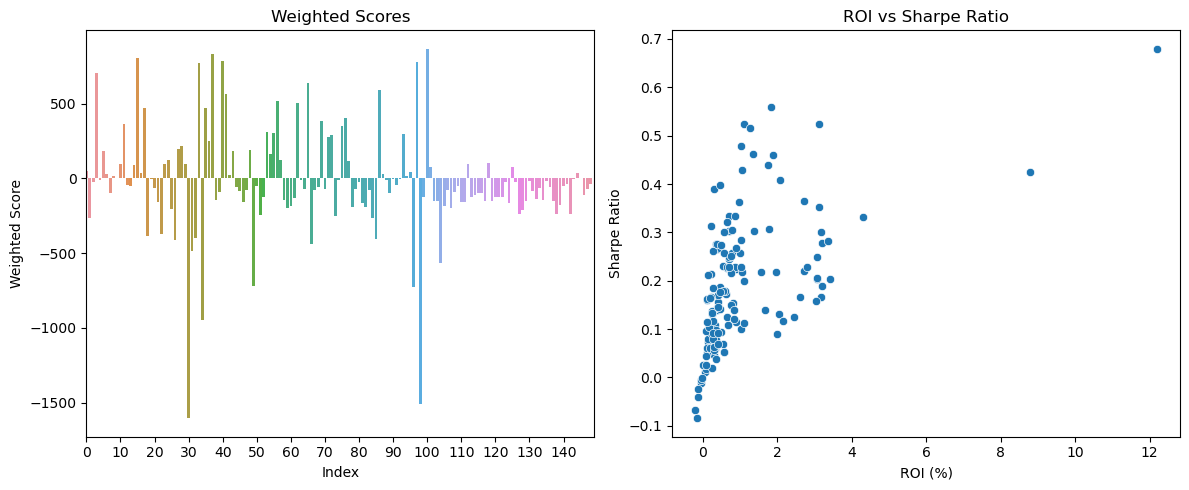

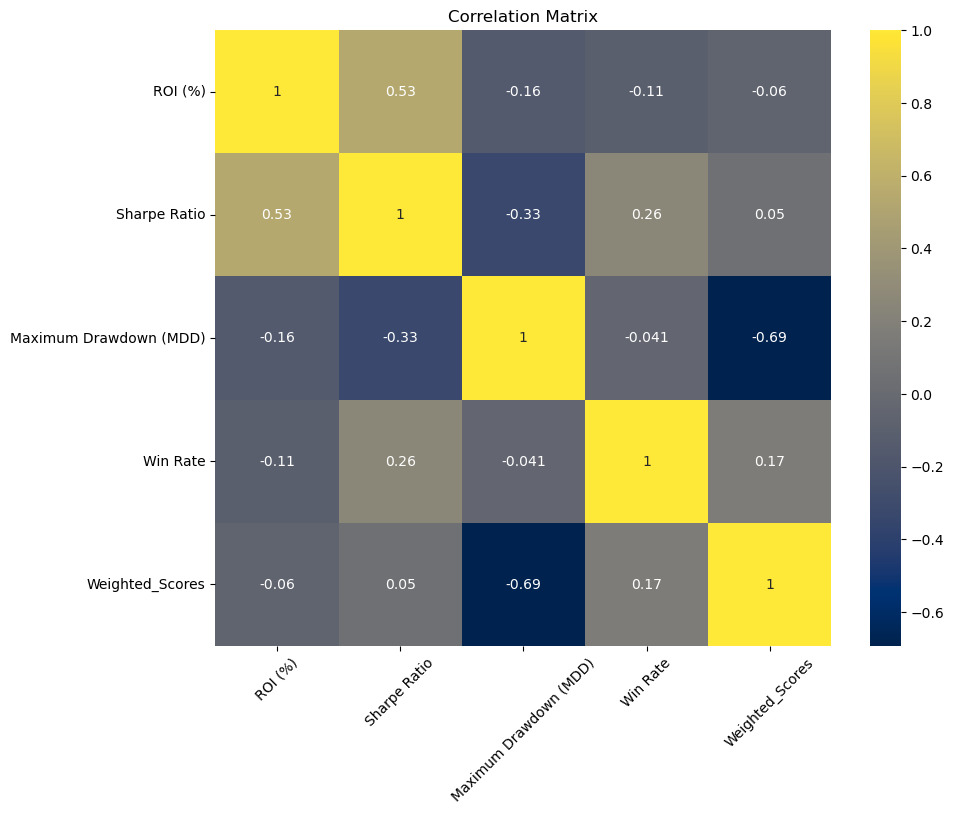

In [26]:
# Visualization
plt.figure(figsize=(12, 5))

# Bar chart for weighted scores
plt.subplot(1, 2, 1)
sns.barplot(x=metrics.index, y=metrics['Weighted_Scores'])
plt.title('Weighted Scores')
plt.xlabel('Index')
plt.ylabel('Weighted Score')
plt.xlim(0, len(metrics))  # Set x-axis limits
plt.xticks(np.arange(0, len(metrics), 10))  # Set x-axis tick labels

# Scatter plot for ROI vs Sharpe Ratio
plt.subplot(1, 2, 2)
sns.scatterplot(x=metrics['ROI (%)'], y=metrics['Sharpe Ratio'])
plt.title('ROI vs Sharpe Ratio')
plt.xlabel('ROI (%)')
plt.ylabel('Sharpe Ratio')
plt.tight_layout()
plt.show()

# Heatmap for correlation between metrics
plt.figure(figsize=(10, 8))
corr_matrix = metrics[['ROI (%)', 'Sharpe Ratio', 'Maximum Drawdown (MDD)', 'Win Rate', 'Weighted_Scores']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='cividis', square=True)
plt.title('Correlation Matrix')
plt.tick_params(axis='x', rotation=45)
plt.show()

**The graphs show the relationship between weighted scores, ROI (Return on Investment), and Sharpe Ratio of different investments.**
- The first graph highlights the diversity of performance among various investments, with some demonstrating significantly higher weighted scores than others.
- The second graph suggests a positive correlation between ROI and Sharpe Ratio, indicating that investments with higher returns tend to have higher risk-adjusted returns as well.

**The correlation matrix shows the correlation between different variables.**
- ROI and Sharpe Ratio have a high positive correlation. This means that stocks with a high ROI tend to also have a high Sharpe Ratio.
- Maximum Drawdown and Weighted Scores have a high negative correlation. This means that stocks with a high Maximum Drawdown tend to have a low Weighted Scores.

### Additional Visualizations:
##### Incorporate more in-depth trend analysis or time-series plots for metrics like PnL and ROI.

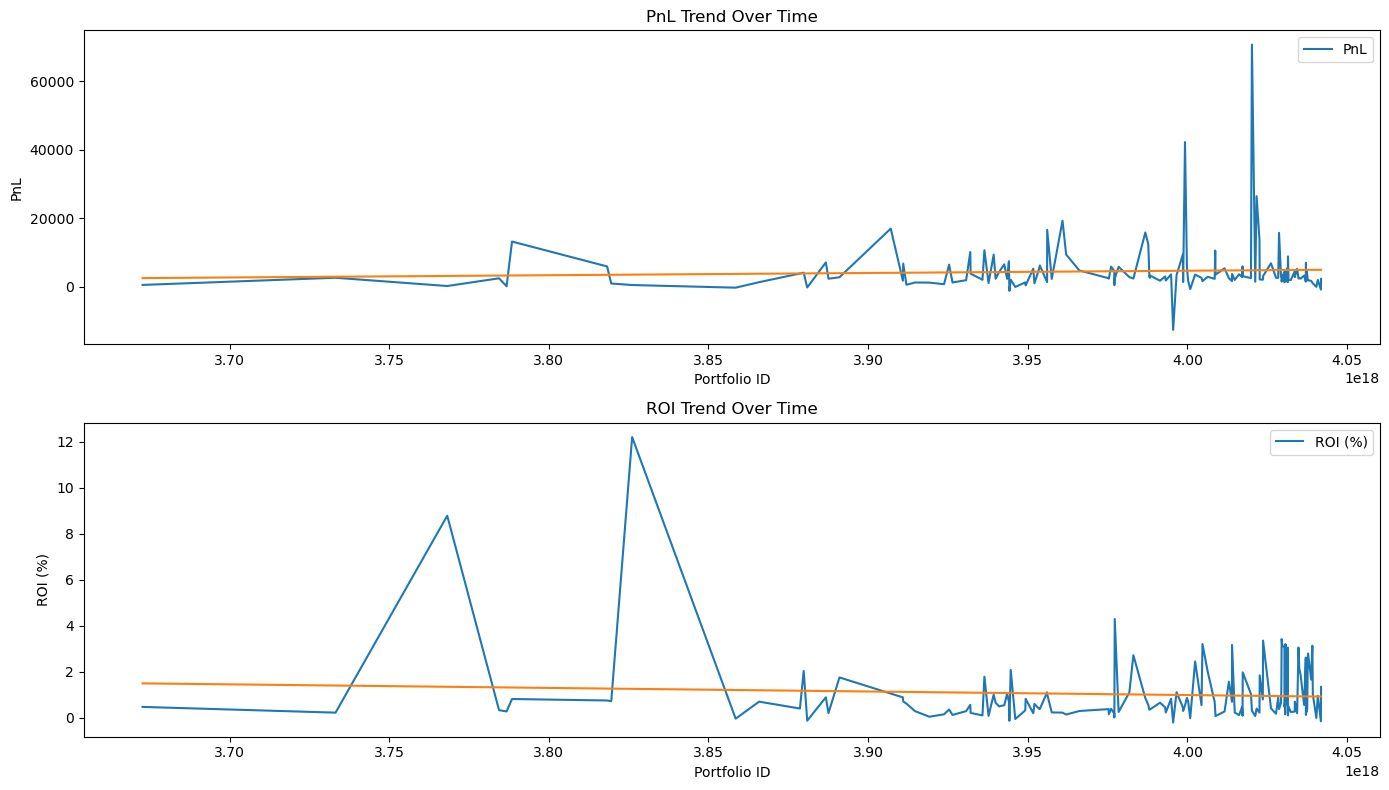

In [27]:
# Assuming 'Port_IDs' represents time periods, sort the data
metrics = metrics.sort_values(by='Port_IDs')

# Convert 'Port_IDs' to datetime if necessary
# metrics['Port_IDs'] = pd.to_datetime(metrics['Port_IDs'], format='your_date_format')

# Plot time-series data for PnL and ROI
plt.figure(figsize=(14, 8))

# PnL plot
plt.subplot(2, 1, 1)
sns.lineplot(x='Port_IDs', y='PnL', data=metrics, label='PnL')
plt.title('PnL Trend Over Time')
plt.xlabel('Portfolio ID')
plt.ylabel('PnL')

# Add a trendline
z = np.polyfit(metrics['Port_IDs'], metrics['PnL'], 1)
p = np.poly1d(z)
plt.plot(metrics['Port_IDs'], p(metrics['Port_IDs']), label='Trendline')

# ROI plot
plt.subplot(2, 1, 2)
sns.lineplot(x='Port_IDs', y='ROI (%)', data=metrics, label='ROI (%)')
plt.title('ROI Trend Over Time')
plt.xlabel('Portfolio ID')
plt.ylabel('ROI (%)')

# Add a trendline
z = np.polyfit(metrics['Port_IDs'], metrics['ROI (%)'], 1)
p = np.poly1d(z)
plt.plot(metrics['Port_IDs'], p(metrics['Port_IDs']), label='Trendline')

plt.tight_layout()
plt.show()

**The two charts show the PnL and ROI over time for a portfolio.**
- The PnL chart shows that the portfolio had a large spike in PnL around 4.0e18, followed by a sharp drop. 
- The ROI chart shows a similar trend with the ROI spiking at 12% at 3.85e18 and then dropping back to 1% by 4.0e18. It can be concluded that the portfolio experienced significant gains and losses over the period shown.

## Step 3: Ranking Algorithm

In [28]:
# Rank the portfolios based on the calculated Weighted_Scores
metrics['Rank'] = metrics['Weighted_Scores'].rank(ascending=False)  # Rank in descending order

# Sort accounts by top 20 ranks
top_20_ranks = metrics.nsmallest(20, 'Rank')

# Print top 20 ranks
print(top_20_ranks)

# Save the DataFrame with metrics
top_20_ranks.to_csv('top_20_ranks.csv', index=False)

print("top_20_ranks calculated and saved.")

                Port_IDs   ROI (%)           PnL  Sharpe Ratio  \
100  4022641794255717633  1.847765   2173.168186      0.558695   
37   3944088772635000577  0.709913   7471.568979      0.301876   
15   3887577207880438784  0.214067   2374.463522      0.088986   
40   3946087913459823360 -0.044231    -32.299519     -0.004557   
97   4021243448368889856  0.086277   1481.962383      0.095176   
33   3939925275039085824  0.658232   2366.280785      0.226715   
3    3784403294629753856  0.340279   2493.618898      0.107410   
65   3988187872032603905  0.364568   2651.548682      0.097928   
86   4011626972687000576  0.282788   5402.369420      0.078530   
41   3949214983441029120  0.330321   1300.204507      0.058529   
56   3977078013600312321  0.191659   4667.771715      0.096516   
62   3986814617275053313  0.859710  15847.596344      0.334142   
35   3942630767220672256  0.555293   6575.783164      0.069573   
17   3907081197088384000  1.056086  16986.456333      0.217718   
76   39998

**Output Interpretation:**
The output shows the top_20_ranks DataFrame with the following columns:

- **Port_IDs:** The unique identifier for each portfolio.

- **ROI (%):** The Return on Investment as a percentage.

- **PnL:** The total Profit and Loss for each portfolio.

- **Sharpe Ratio:** The risk-adjusted return for each portfolio.

- **Maximum Drawdown (MDD):** The largest loss from a peak to a trough in the cumulative returns for each portfolio.

- **Win Rate:** The percentage of profitable trades for each portfolio.

- **Win Positions:** The number of profitable trades for each portfolio.

- **Total Positions:** The total number of trades for each portfolio.

- **Weighted_Scores:** The final weighted scores for each portfolio.

- **Rank:** The rank of each portfolio based on the weighted scores.

For example, the portfolio with Port_IDs 4022641794255717633 has a rank of 1, indicating that it has the highest weighted score among all portfolios.

## Step 4: Documentation -  In word file